In [2]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('data_RFM.csv')

In [4]:
data.head()

,Unnamed: 0,customer_unique_id,frequency,recency,amount_spent
0,0,7c396fd4830fd04220f754e42b4e5bff,2,335,65.38
1,3,af07308b275d755c9edb36a90c618231,1,40,118.70
2,4,3a653a41f6f9fc3d2a113cf8398680e8,1,26,159.90
3,5,7c142cf63193a1473d2e66489a9ae977,1,288,45.00
4,6,72632f0f9dd73dfee390c9b22eb56dd6,1,201,19.90


In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
data.set_index('customer_unique_id', inplace=True)

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)

In [9]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 15)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(data_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

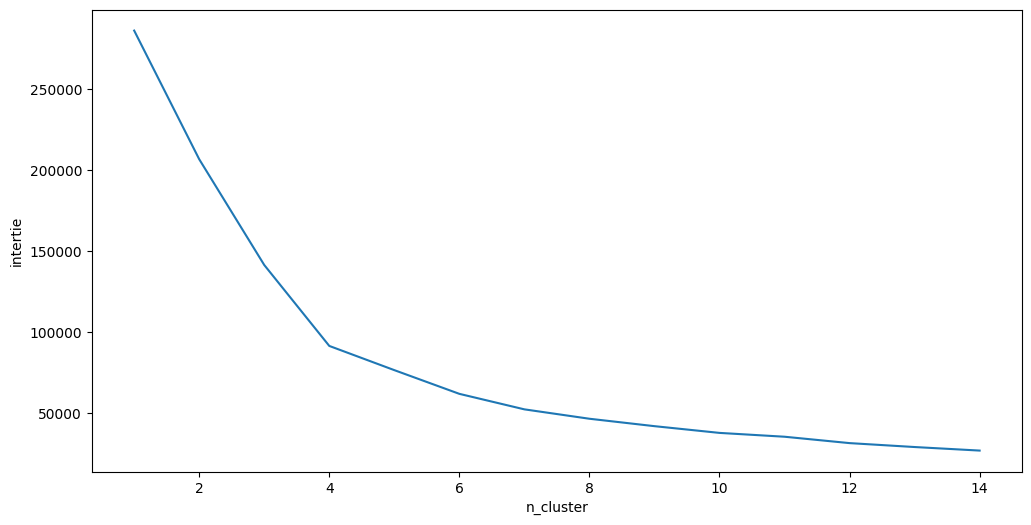

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [ ]:
data_cluster = pd.DataFrame(data={'cluster': kmeans.labels_}, index=data.index)
data = data.merge(data_cluster, left_index=True, right_index=True)

In [ ]:
data.head()

,frequency,recency,amount_spent,cluster
customer_unique_id,,,,
7c396fd4830fd04220f754e42b4e5bff,2,335,65.38,3
af07308b275d755c9edb36a90c618231,1,40,118.70,0
3a653a41f6f9fc3d2a113cf8398680e8,1,26,159.90,0
7c142cf63193a1473d2e66489a9ae977,1,288,45.00,1
72632f0f9dd73dfee390c9b22eb56dd6,1,201,19.90,0


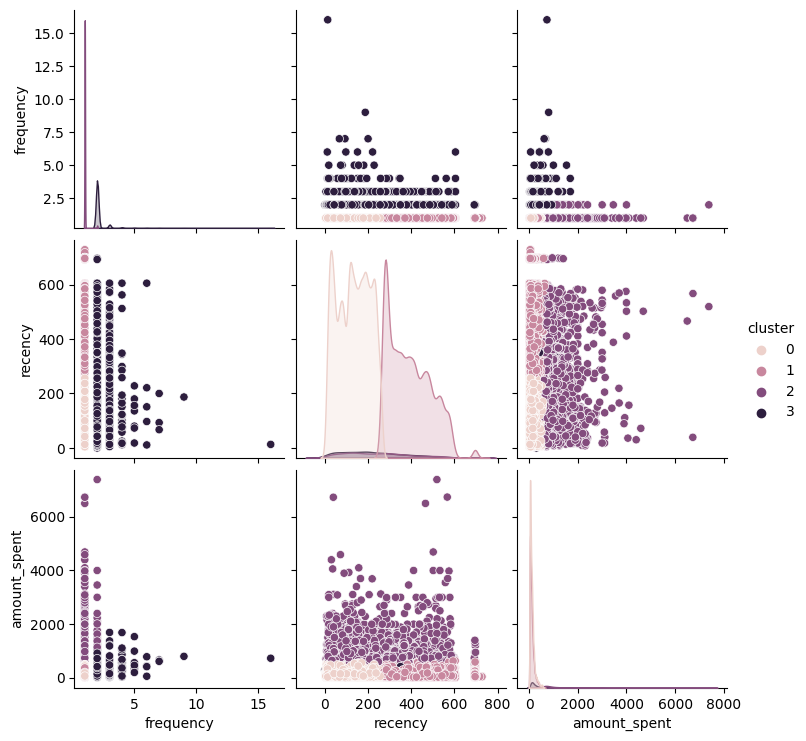

In [ ]:
sns.pairplot(data, hue="cluster")

In [ ]:
data_cluster_0 = data.loc[data['cluster']==0]
data_cluster_1 = data.loc[data['cluster']==1]
data_cluster_2 = data.loc[data['cluster']==2]
data_cluster_3 = data.loc[data['cluster']==3]

In [ ]:
data.describe()

,frequency,recency,amount_spent,cluster
count,95420.000000,95420.000000,95420.000000,95420.000000
mean,1.034018,242.600377,130.249385,0.544372
std,0.211234,153.160320,197.308267,0.694316
min,1.000000,0.000000,0.850000,0.000000
25%,1.000000,118.000000,43.890000,0.000000
50%,1.000000,223.000000,79.900000,0.000000
75%,1.000000,352.000000,144.990000,1.000000
max,16.000000,728.000000,7388.000000,3.000000


In [ ]:
data_cluster_0.describe()

,frequency,recency,amount_spent,cluster
count,51759.0,51759.000000,51759.000000,51759.0
mean,1.0,132.433413,102.740606,0.0
std,0.0,72.546192,89.662263,0.0
min,1.0,4.000000,0.850000,0.0
25%,1.0,69.000000,40.000000,0.0
50%,1.0,134.000000,78.000000,0.0
75%,1.0,194.000000,132.990000,0.0
max,1.0,262.000000,590.000000,0.0


In [ ]:
data_cluster_1.describe()

,frequency,recency,amount_spent,cluster
count,38261.0,38261.000000,38261.000000,38261.0
mean,1.0,392.735736,103.055808,1.0
std,0.0,96.477340,91.462009,0.0
min,1.0,263.000000,1.200000,1.0
25%,1.0,304.000000,40.000000,1.0
50%,1.0,380.000000,75.000000,1.0
75%,1.0,467.000000,129.990000,1.0
max,1.0,728.000000,649.170000,1.0


In [ ]:
data_cluster_2.describe()

,frequency,recency,amount_spent,cluster
count,2517.000000,2517.000000,2517.000000,2517.0
mean,1.011919,245.815256,1017.180290,2.0
std,0.108543,151.924442,573.333092,0.0
min,1.000000,5.000000,548.000000,2.0
25%,1.000000,120.000000,667.000000,2.0
50%,1.000000,232.000000,819.000000,2.0
75%,1.000000,352.000000,1190.000000,2.0
max,2.000000,698.000000,7388.000000,2.0


In [ ]:
data_cluster_3.describe()

,frequency,recency,amount_spent,cluster
count,2883.000000,2883.000000,2883.000000,2883.0
mean,2.115505,225.157128,210.677853,3.0
std,0.510316,144.574762,172.162756,0.0
min,2.000000,0.000000,11.980000,3.0
25%,2.000000,109.000000,99.800000,3.0
50%,2.000000,204.000000,160.990000,3.0
75%,2.000000,324.000000,267.300000,3.0
max,16.000000,696.000000,1690.920000,3.0


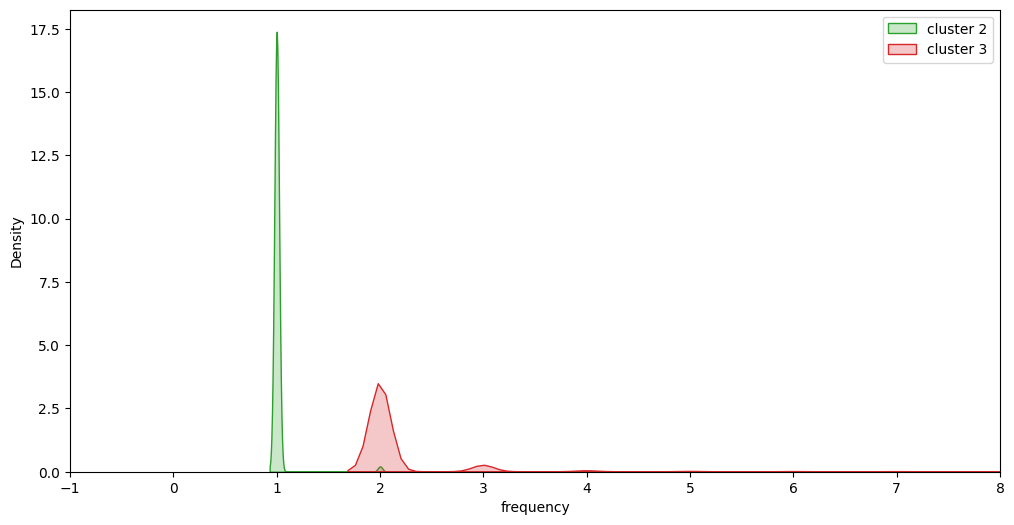

In [ ]:
# Plot the distribution of frequency for each cluster
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.kdeplot(data_cluster_0['frequency'], shade=True, label='cluster 0')
sns.kdeplot(data_cluster_1['frequency'], shade=True, label='cluster 1')
sns.kdeplot(data_cluster_2['frequency'], shade=True, label='cluster 2')
sns.kdeplot(data_cluster_3['frequency'], shade=True, label='cluster 3')
plt.legend()
plt.xlim(-1, 8)
plt.show()

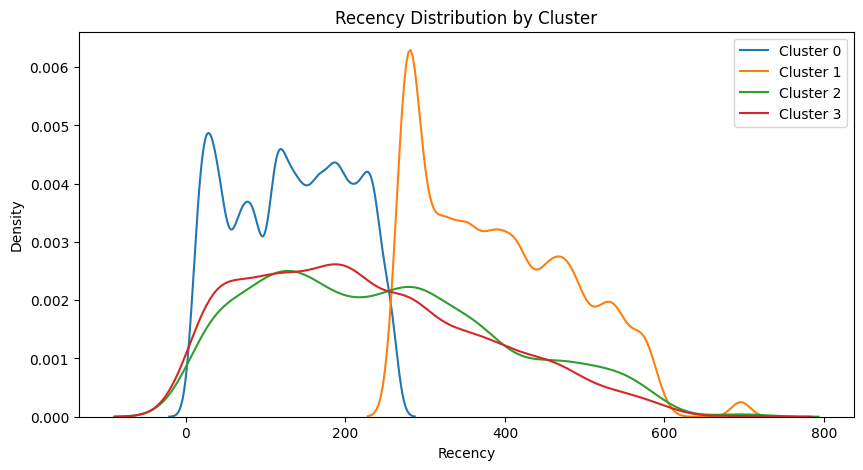

In [ ]:
# Plot the distribution of recency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0['recency'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1['recency'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2['recency'], label='Cluster 2', legend=True)
sns.kdeplot(data_cluster_3['recency'], label='Cluster 3', legend=True)
plt.title('Recency Distribution by Cluster')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.legend()
plt.show()

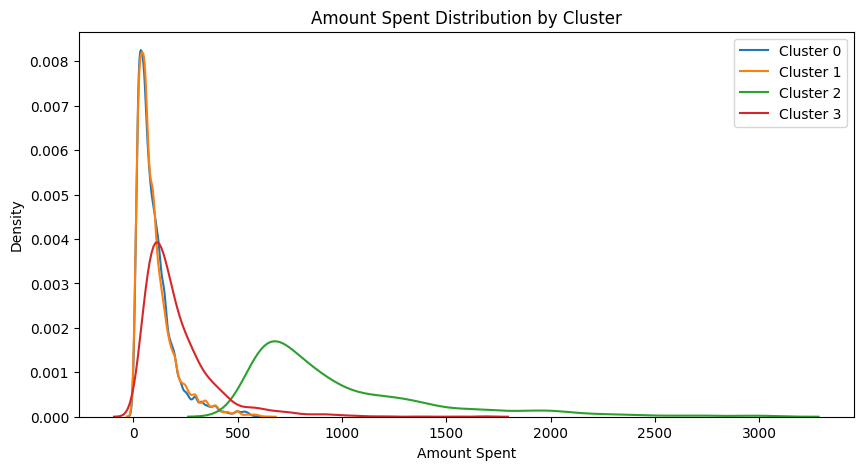

In [ ]:
# Plot the distribution of amount spent under 3000 for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0.loc[data_cluster_0['amount_spent']<3000]['amount_spent'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1.loc[data_cluster_1['amount_spent']<3000]['amount_spent'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2.loc[data_cluster_2['amount_spent']<3000]['amount_spent'], label='Cluster 2', legend=True)
sns.kdeplot(data_cluster_3.loc[data_cluster_3['amount_spent']<3000]['amount_spent'], label='Cluster 3', legend=True)
plt.title('Amount Spent Distribution by Cluster')
plt.xlabel('Amount Spent')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
data_scaled = data_scaled.merge(data_cluster, left_index=True, right_index=True)

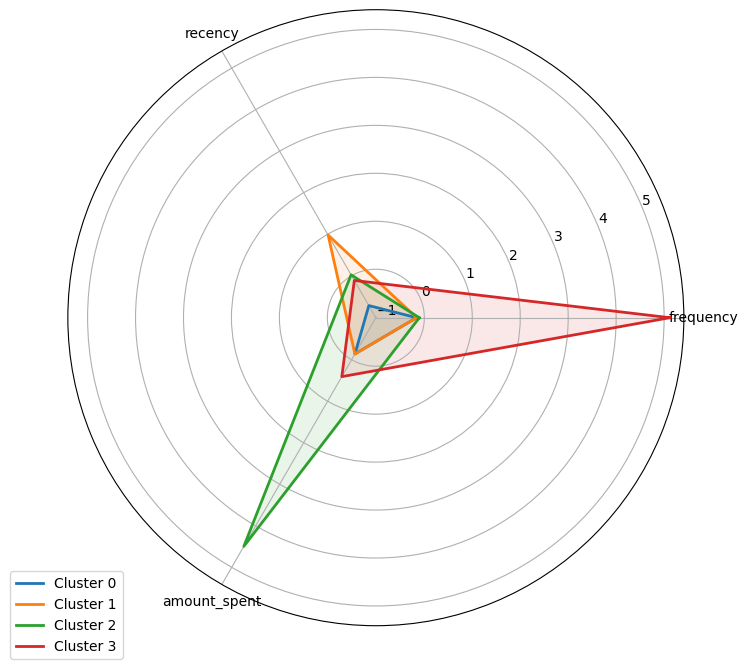

In [ ]:
cluster_names = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]
variables = ["frequency", "recency", "amount_spent"]
data_values = []
data_scaled.merge(data_cluster, left_index=True, right_index=True)

# Récupération des données pour chaque variable et chaque cluster
for cluster in range(4):
    values = []
    for variable in variables:
        values.append(data_scaled[data_scaled["cluster"] == cluster][variable].mean())
    data_values.append(values)

# Ajout de la première variable à la fin de la liste pour fermer le polygone
for i in range(4):
    data_values[i].append(data_values[i][0])

# Calcul de l'angle pour chaque variable
angles = [n / float(len(variables)) * 2 * np.pi for n in range(len(variables))]
angles.append(angles[0])

# Initialisation du plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Création du polygone pour chaque cluster
for i in range(4):
    values = data_values[i]
    ax.plot(angles, values, linewidth=2, label=cluster_names[i])
    ax.fill(angles, values, alpha=0.1)

# Ajout des labels pour chaque variable
plt.xticks(angles[:-1], variables)

# Ajout de la légende
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Affichage du radar chart
plt.show()

In [ ]:
'''#Silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled, kmeans.labels_)'''

silhouette_score_kmean = 0.5792446871003182

In [ ]:
'''#import silhouette visualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer 
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(data_scaled)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data'''

'#import silhouette visualizer\nfrom yellowbrick.cluster import SilhouetteVisualizer\n\n# Instantiate the clustering model and visualizer \nmodel = KMeans(4)\nvisualizer = SilhouetteVisualizer(model)\n\nvisualizer.fit(data_scaled)    # Fit the data to the visualizer\nvisualizer.poof()    # Draw/show/poof the data'

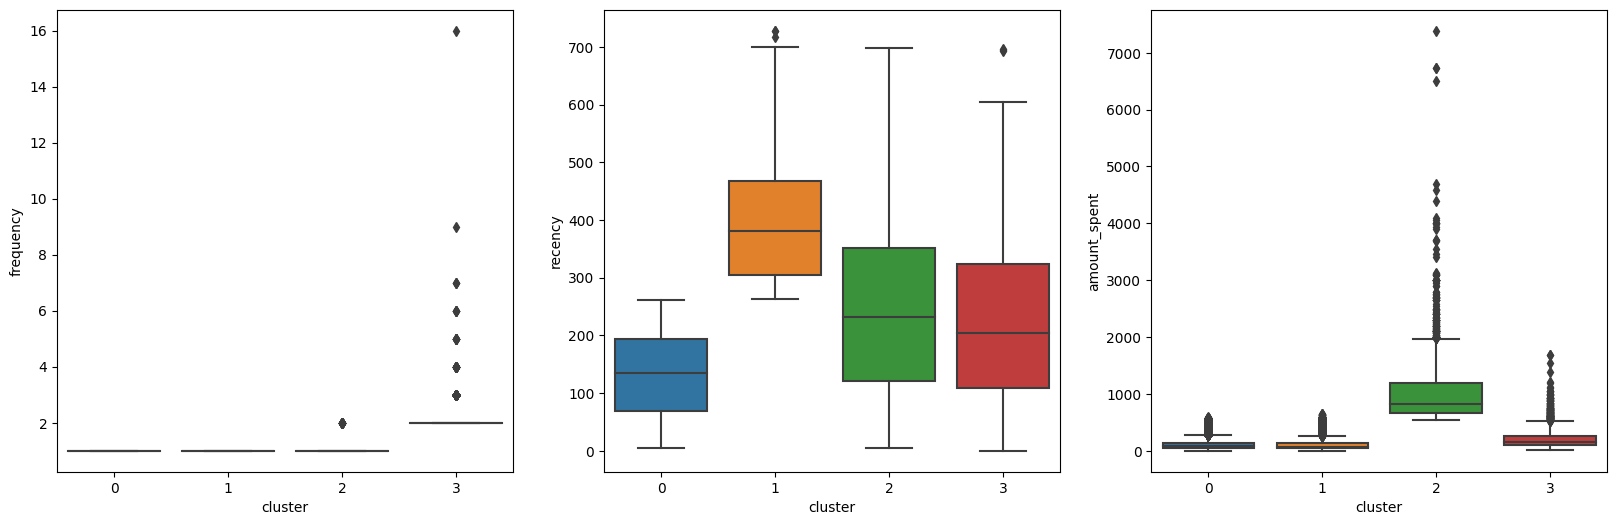

In [ ]:
#boxplots for each cluster
fig, ax = plt.subplots(1,3,figsize=(20,6))
sns.boxplot(x='cluster', y='frequency', data=data, ax=ax[0])
sns.boxplot(x='cluster', y='recency', data=data, ax=ax[1])
sns.boxplot(x='cluster', y='amount_spent', data=data, ax=ax[2])
plt.show()

In [ ]:
data_scaled.drop(columns=['cluster'], inplace=True)

In [ ]:
# Import the PCA method
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA(n_components=2)
data_scaled_pca = pca.fit_transform(data_scaled)
data_scaled_pca = pd.DataFrame(data_scaled_pca, columns=['PC1', 'PC2'], index=data_scaled.index)

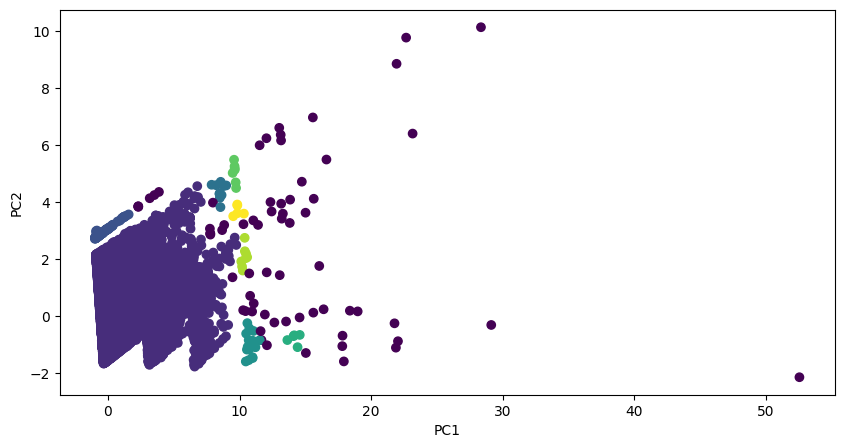

In [ ]:
# dbscan on pca
from sklearn.cluster import DBSCAN
from numpy import unique

# Create a DBSCAN instance: dbscan
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit model
x = dbscan.fit_predict(data_scaled_pca)

clusters = unique(x)

# Plot the cluster assignments
plt.figure(figsize=(10,5))
plt.scatter(data_scaled_pca['PC1'], data_scaled_pca['PC2'], c=x, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
data_scaled_pca['cluster'] = x
data_scaled_pca.head()

,PC1,PC2,cluster
customer_unique_id,,,
7c396fd4830fd04220f754e42b4e5bff,2.924336,0.422691,0
af07308b275d755c9edb36a90c618231,0.042406,-1.297438,0
3a653a41f6f9fc3d2a113cf8398680e8,0.200018,-1.338362,0
7c142cf63193a1473d2e66489a9ae977,-0.456223,0.192190,0
72632f0f9dd73dfee390c9b22eb56dd6,-0.459400,-0.389766,0


In [ ]:
data_scaled_pca['cluster'].value_counts()

 0    95013
 1      290
-1       67
 3       15
 2       10
 6        8
 5        7
 4        5
 7        5
Name: cluster, dtype: int64

In [ ]:
data_scaled_pca = data_scaled_pca.merge(data_cluster, left_index=True, right_index=True)

In [ ]:
'''silhouette_score(data_scaled_pca, dbscan.labels_)'''
silhouette_score_dbscan = 0.44732465658949966

In [ ]:
data_2 = pd.read_csv('data_2.csv', index_col=0)

In [ ]:
data_2.head()

,customer_unique_id,frequency,recency,amount_spent,mean_review_score
0,7c396fd4830fd04220f754e42b4e5bff,2,335,65.38,4.5
3,af07308b275d755c9edb36a90c618231,1,40,118.70,4.0
4,3a653a41f6f9fc3d2a113cf8398680e8,1,26,159.90,5.0
5,7c142cf63193a1473d2e66489a9ae977,1,288,45.00,5.0
6,72632f0f9dd73dfee390c9b22eb56dd6,1,201,19.90,5.0


In [ ]:
data_2.set_index('customer_unique_id', inplace=True)

In [ ]:
scaler = StandardScaler()
data_scaled_2 = scaler.fit_transform(data_2)
data_scaled_2 = pd.DataFrame(data_scaled_2, columns=data_2.columns, index=data_2.index)

In [ ]:
#detect nan values
data_scaled_2.isna().sum()

frequency            0
recency              0
amount_spent         0
mean_review_score    0
dtype: int64

In [ ]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 15)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(data_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

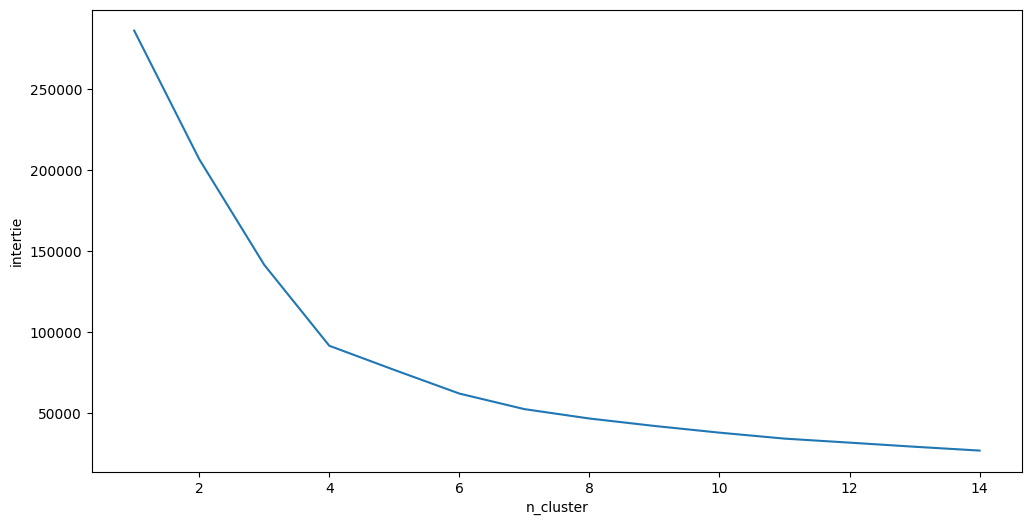

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_2)

KMeans(n_clusters=4, random_state=0)

In [ ]:
data_2_cluster_0 = data_2.loc[kmeans.labels_ == 0]
data_2_cluster_1 = data_2.loc[kmeans.labels_ == 1]
data_2_cluster_2 = data_2.loc[kmeans.labels_ == 2]
data_2_cluster_3 = data_2.loc[kmeans.labels_ == 3]

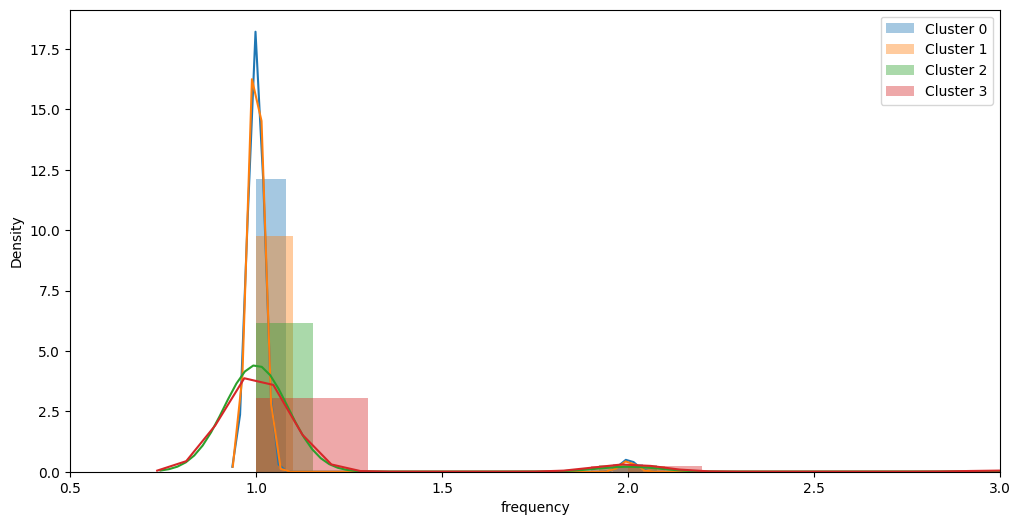

In [ ]:
# Plot the distribution of frequency for each cluster
plt.figure(figsize=(12,6))
sns.distplot(data_2_cluster_0['frequency'], label='Cluster 0')
sns.distplot(data_2_cluster_1['frequency'], label='Cluster 1')
sns.distplot(data_2_cluster_2['frequency'], label='Cluster 2')
sns.distplot(data_2_cluster_3['frequency'], label='Cluster 3')
plt.legend()
plt.xlim(0.5, 3)
plt.show()

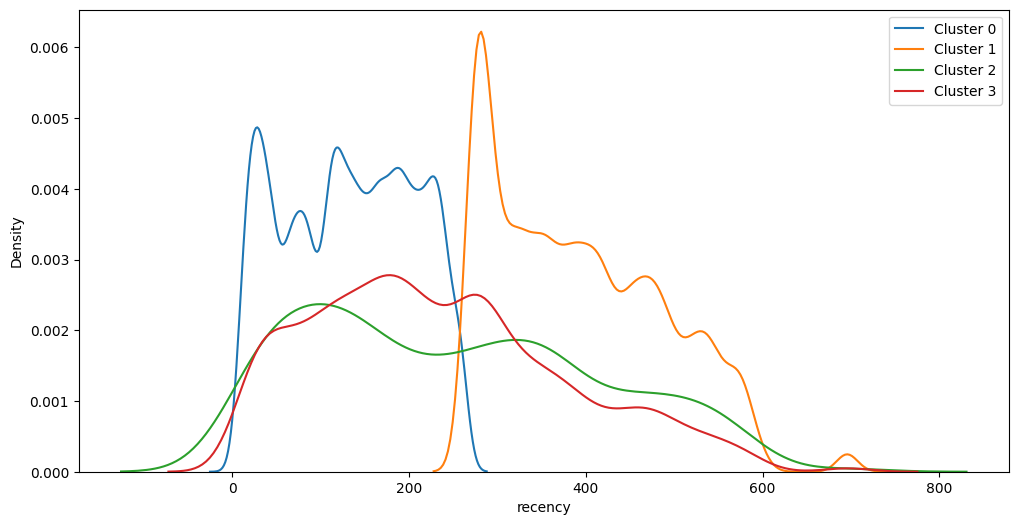

In [ ]:
# Plot the distribution of recency for each cluster
plt.figure(figsize=(12,6))
sns.kdeplot(data_2_cluster_0['recency'], label='Cluster 0')
sns.kdeplot(data_2_cluster_1['recency'], label='Cluster 1')
sns.kdeplot(data_2_cluster_2['recency'], label='Cluster 2')
sns.kdeplot(data_2_cluster_3['recency'], label='Cluster 3')
plt.legend()
plt.show()

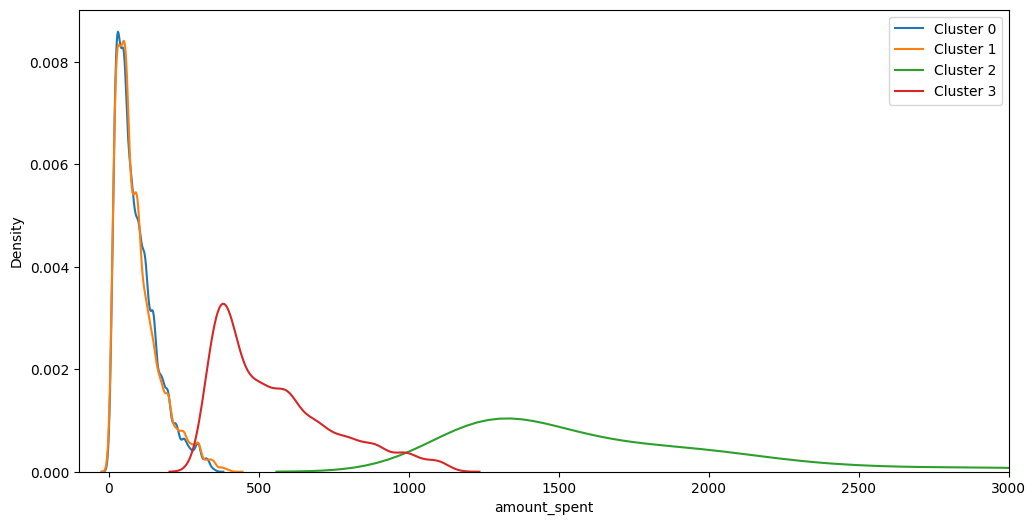

In [ ]:
#plot the distribution of amount_spent for each cluster
plt.figure(figsize=(12,6))
sns.kdeplot(data_2_cluster_0['amount_spent'], label='Cluster 0')
sns.kdeplot(data_2_cluster_1['amount_spent'], label='Cluster 1')
sns.kdeplot(data_2_cluster_2['amount_spent'], label='Cluster 2')
sns.kdeplot(data_2_cluster_3['amount_spent'], label='Cluster 3')
plt.legend()
plt.xlim(-100, 3000)
plt.show()

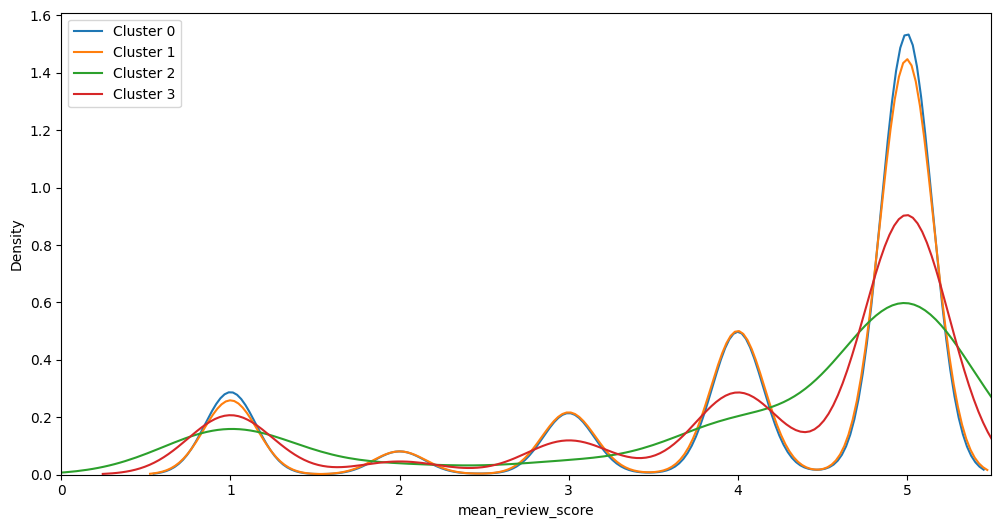

In [ ]:
#plot the distribution of mean_review_score for each cluster
plt.figure(figsize=(12,6))
sns.kdeplot(data_2_cluster_0['mean_review_score'], label='Cluster 0')
sns.kdeplot(data_2_cluster_1['mean_review_score'], label='Cluster 1')
sns.kdeplot(data_2_cluster_2['mean_review_score'], label='Cluster 2')
sns.kdeplot(data_2_cluster_3['mean_review_score'], label='Cluster 3')
plt.legend()
plt.xlim(0, 5.5)
plt.show()

In [ ]:
'''#Silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(data_2, kmeans.labels_)'''
silhouette_score_kmeans_2 = 0.4756243317307347

In [ ]:
# Create a PCA instance: pca
pca = PCA(n_components=2)
data_scaled_pca_2 = pca.fit_transform(data_scaled_2)
data_scaled_pca_2 = pd.DataFrame(data_scaled_pca_2, columns=['PC1', 'PC2'], index=data_scaled_2.index)

In [ ]:
# Create a DBSCAN instance: dbscan
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit model
x = dbscan.fit_predict(data_scaled_pca_2)

clusters = unique(x)

# Plot the cluster assignments
plt.figure(figsize=(10,5))
plt.scatter(data_scaled_pca_2['PC1'], data_scaled_pca_2['PC2'], c=x, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

NameError: name 'DBSCAN' is not defined

In [ ]:
data_scaled_pca_2['cluster'] = x
data_scaled_pca_2['cluster'].value_counts()

 0     94903
-1       148
 4        82
 21       29
 9        24
       ...  
 38        2
 36        2
 24        2
 32        2
 60        2
Name: cluster, Length: 62, dtype: int64

In [ ]:
'''silhouette_score(data_scaled_pca_2, dbscan.labels_)'''
silhouette_score_dbscan_2 = 0.8262549022866224